# Text processing: cleaning up text and generating embeddings

In [1]:
#TODO: remove after development 
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', 5400)
pd.set_option('max_colwidth', 60)

## Loading data

In [4]:
from fiz_lernmodule import data_reader

#seed_name = 'hair_dryer'
#seed_name = 'video_codec'
#seed_name = 'diesel'
seed_name = "contact_lens"
#seed_name = "contact_lens_us_c"
#seed_name = "3d_printer"

src_dir = "."

landscape_reader = data_reader.LandscapeDataReader(src_dir=src_dir)
df = landscape_reader.load_data(seed_name=seed_name)

df.index = df.index.astype(int)

Loading data from .\data\contact_lens\landscape_data.pkl
Finished loading.


In [5]:
df.shape

(3227, 13)

In [6]:
seed = df.loc[df['ExpansionLevel'] == 'Seed']

seed.reset_index(inplace = True)
seed.drop(columns = ['index'], inplace = True)

seed.drop_duplicates(["publication_number"], inplace=True)

print(seed.shape)
seed.head()

(3225, 13)


,pub_num,publication_number,country_code,family_id,priority_date,title_text,abstract_text,claims_text,refs,cpcs,ipcs,assignees_harmonized,ExpansionLevel
0,4104187,US-4104187-A,US,24713901,19760412,Composition and method treating soft contact lenses at e...,Method and compositions are provided for elevated temper...,What is claimed is: \n \n 1. A soft lens therm...,"US-3171752-A,US-4013576-A,US-2089212-A,US-3888782-A,US-3...","C11D1/523,C11D3/0078,A61L12/148","C11D17/00,G02C7/04,C11D1/66,C11D1/52,G02C13/00,C11D1/90,...",BARNES HIND PHARM INC,Seed
1,6000534,US-6000534-A,US,24806490,19960816,Contact lens disinfecting device and disinfection system,The present invention provides a device for disinfecting...,I claim: \n \n 1. A device for disinfecting an...,"US-4750610-A,US-4889693-A,US-5143104-A,US-5353949-A,US-5...","A45C11/005,Y10S134/901,A61L12/128","A61L12/12,G02C13/00,A61L2/18,A45C11/00",ALLERGAN SALES INC,Seed
2,7281794,US-7281794-B2,US,25536666,20011116,Disposable ophthalmic lens,"An ophthalmic lens with high definition, wide field of v...",What is claimed and desired to be secured by Letters Pat...,"US-6471396-B2,US-4921205-A,US-4613379-A,US-5706073-A,US-...",A61B3/125,"G02C7/04,A61B3/125",HEACOCK GREGORY L,Seed
3,8693104,US-8693104-B2,US,44651943,20100824,Lens with compound linear-convex meniscus wall,The present invention relates generally to an arcuate li...,The invention claimed is: \n \n 1. An optical ...,"WO-2008062067-A1,US-7724444-B2,US-7311398-B2,WO-20040998...","G02C7/085,G02B26/004,A61F2/1635,G02C7/08,G02B3/14,G02C7/04","G02B3/12,G02B1/06","KERNICK EDWARD R,RIALL JAMES DANIEL,JOHNSON & JOHNSON VI...",Seed
4,8215770,US-8215770-B2,US,40337739,20070223,Ophthalmic dynamic aperture,Embodiments of the present invention relate to an electr...,"1. An ophthalmic device, comprising:\n an electro-active...","US-6956682-B2,US-5608567-A,US-5963300-A,US-4904063-A,US-...","G02C7/12,A61F2/145,A61F2250/001,A61F2/141,G02C2202/04,A6...","G02C7/04,A61F2/16","HADDOCK JOSHUA N,VAN HEUGTEN ANTHONY,KOKONASKI WILLIAM,B...",Seed


## Filtering data by year for contact lens dataset

In [7]:
from sklearn.model_selection import train_test_split

#if seed_name == 'contact_lens':
    #sample, rest = train_test_split(seed, train_size=0.33, random_state=42)
    #seed = sample    
    #print(seed.shape)

## Tokenizing and removing stopwords

In [8]:
seed["text_prep"] = seed["title_text"].str.cat(seed[["abstract_text"]], sep=" ")

if "claims_text" in seed.columns:
    seed["claims_text"] = seed["claims_text"].astype('str')
    seed["text_prep"] = seed["text_prep"].str.cat(seed[["claims_text"]], sep=" ")

if "description_text" in seed.columns:
    seed["text_prep"] = seed["text_prep"].str.cat(seed[["description_text"]], sep=" ")

In [9]:
from fiz_lernmodule.preprocessing import PreProcessor

pre = PreProcessor()

seed['tokens'] = seed['text_prep'].map(lambda t: pre.preprocess_text(t, remove_short_long = True))
seed.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tskripnikova\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Using TensorFlow backend.


,pub_num,publication_number,country_code,family_id,priority_date,title_text,abstract_text,claims_text,refs,cpcs,ipcs,assignees_harmonized,ExpansionLevel,text_prep,tokens
0,4104187,US-4104187-A,US,24713901,19760412,Composition and method treating soft contact lenses at e...,Method and compositions are provided for elevated temper...,What is claimed is: \n \n 1. A soft lens therm...,"US-3171752-A,US-4013576-A,US-2089212-A,US-3888782-A,US-3...","C11D1/523,C11D3/0078,A61L12/148","C11D17/00,G02C7/04,C11D1/66,C11D1/52,G02C13/00,C11D1/90,...",BARNES HIND PHARM INC,Seed,Composition and method treating soft contact lenses at e...,"[composition, treating, soft, contact, lenses, elevated,..."
1,6000534,US-6000534-A,US,24806490,19960816,Contact lens disinfecting device and disinfection system,The present invention provides a device for disinfecting...,I claim: \n \n 1. A device for disinfecting an...,"US-4750610-A,US-4889693-A,US-5143104-A,US-5353949-A,US-5...","A45C11/005,Y10S134/901,A61L12/128","A61L12/12,G02C13/00,A61L2/18,A45C11/00",ALLERGAN SALES INC,Seed,Contact lens disinfecting device and disinfection system...,"[contact, lens, disinfecting, device, disinfection, syst..."
2,7281794,US-7281794-B2,US,25536666,20011116,Disposable ophthalmic lens,"An ophthalmic lens with high definition, wide field of v...",What is claimed and desired to be secured by Letters Pat...,"US-6471396-B2,US-4921205-A,US-4613379-A,US-5706073-A,US-...",A61B3/125,"G02C7/04,A61B3/125",HEACOCK GREGORY L,Seed,Disposable ophthalmic lens An ophthalmic lens with high ...,"[disposable, ophthalmic, lens, ophthalmic, lens, high, d..."
3,8693104,US-8693104-B2,US,44651943,20100824,Lens with compound linear-convex meniscus wall,The present invention relates generally to an arcuate li...,The invention claimed is: \n \n 1. An optical ...,"WO-2008062067-A1,US-7724444-B2,US-7311398-B2,WO-20040998...","G02C7/085,G02B26/004,A61F2/1635,G02C7/08,G02B3/14,G02C7/04","G02B3/12,G02B1/06","KERNICK EDWARD R,RIALL JAMES DANIEL,JOHNSON & JOHNSON VI...",Seed,Lens with compound linear-convex meniscus wall The prese...,"[lens, compound, linear, convex, meniscus, wall, arcuate..."
4,8215770,US-8215770-B2,US,40337739,20070223,Ophthalmic dynamic aperture,Embodiments of the present invention relate to an electr...,"1. An ophthalmic device, comprising:\n an electro-active...","US-6956682-B2,US-5608567-A,US-5963300-A,US-4904063-A,US-...","G02C7/12,A61F2/145,A61F2250/001,A61F2/141,G02C2202/04,A6...","G02C7/04,A61F2/16","HADDOCK JOSHUA N,VAN HEUGTEN ANTHONY,KOKONASKI WILLIAM,B...",Seed,Ophthalmic dynamic aperture Embodiments of the present i...,"[ophthalmic, dynamic, aperture, embodiments, electro, ac..."


### Checking distribution of data

421.99937984496125


Text(0, 0.5, 'Count')

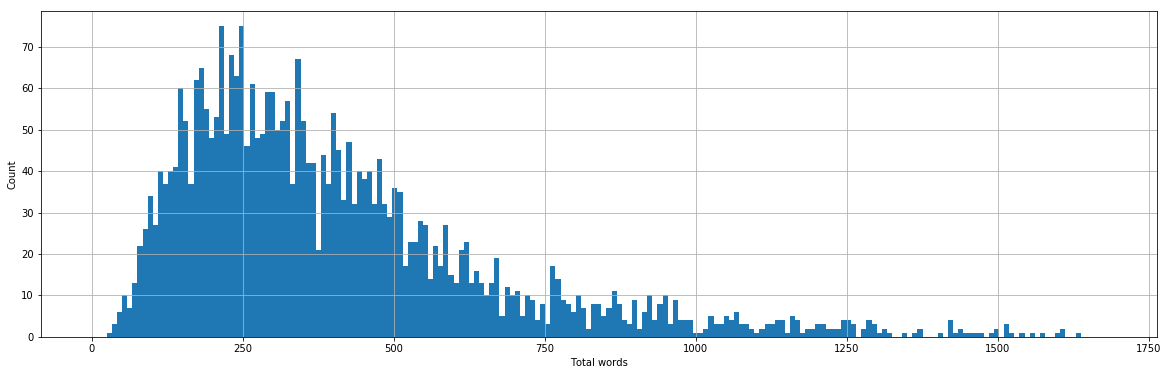

In [10]:
import matplotlib.pyplot as plt

stats = pd.DataFrame()
stats['total_words'] = seed['tokens'].apply(lambda x: len(x))

m = np.mean(stats.total_words)
print(m)

plt.subplots(figsize=(20,6))
stats['total_words'].hist(bins = np.arange(0, m*4, m/50))
plt.xlabel('Total words')
plt.ylabel('Count')

### Removing patents with not enough text (less than 30 words)

In [11]:
seed = seed[seed['tokens'].apply(lambda x: len(x) > 30)]
seed.reset_index(drop=True, inplace=True)

In [12]:
import pickle

with open(src_dir + "/data/" + seed_name + '/cleaned_text.pkl', 'wb') as outfile:
    pickle.dump(seed, outfile, protocol=pickle.HIGHEST_PROTOCOL)